# Présentation des données
## Import des fonctions

In [11]:
source("../src/plot_over_months_by_station.R")
source("../src/plot_station_avg_by_month.R")
source("../src/plot_boxplot_by_season.R")

## Import de la base donnée des observations

In [12]:
data <- read.csv("../csv/observations.csv", header = TRUE, sep = ",")
print(dim(data))  # Print the dimensions of the data frame

[1] 1719567      62


## Import de la base de données de stations

In [13]:
stations <-read.csv("../csv/stations.csv", header = TRUE, sep = ",")
print(dim(stations))  # Print the dimensions of the data frame

[1] 62 12


##### On va regarder dans cette partie que les stations dans France métropôle

In [14]:
library(dplyr)

# Codes Insee des régions métropolitaines (hors DROM-COM)
codes_metropole <- c(11, 24, 27, 28, 32, 44, 52, 53, 75, 76, 84, 94) 

# ---- 1. Filtrer les stations métropolitaines ----
stations_metropole <- stations %>% 
  dplyr::filter(region..code. %in% codes_metropole)

# Récupérer la liste des ID de stations métropolitaines
id_metropole <- stations_metropole$ID.OMM.station

# ---- 2. Charger la base observations météo ----
# Exemple : data <- read.csv("observations.csv")

# Filtrer uniquement les observations de France métropolitaine
data_metropole <- data %>% 
  dplyr::filter(ID.OMM.station %in% id_metropole)

### Suivi d'évolution **mensuelle** de quelques variables 
 

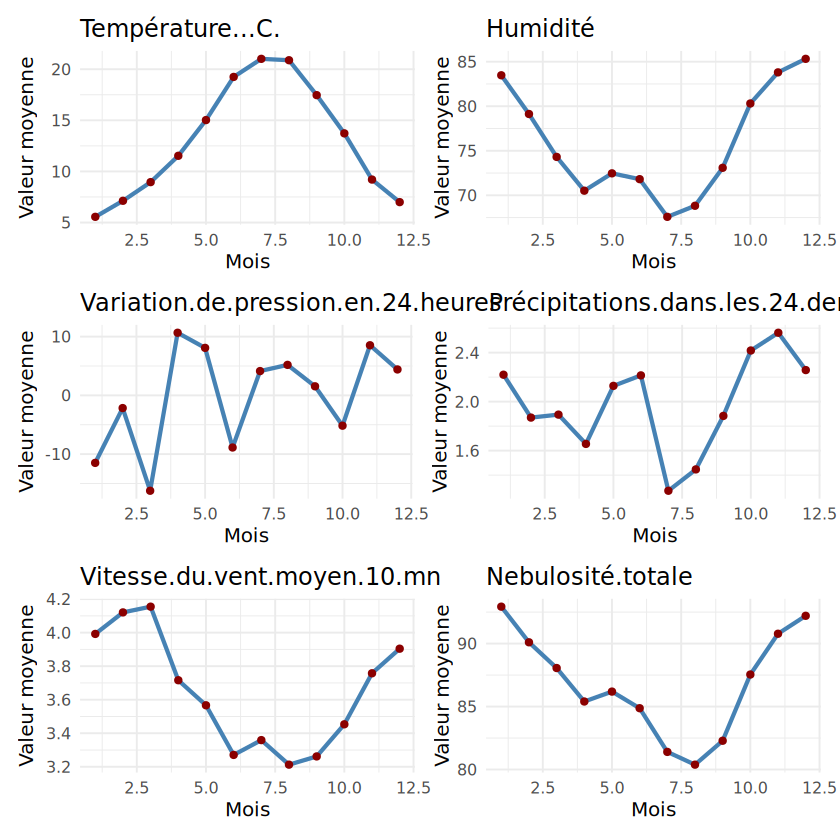

In [ ]:
library(dplyr)
library(ggplot2)
library(patchwork)



# ---- 1. Charger la base des métadonnées stations (communes/régions) ----
# exemple : stations <- read.csv("stations.csv")



# Variables sélectionnées
vars <- c("Température...C.", 
          "Humidité", 
          "Variation.de.pression.en.24.heures", 
          "Précipitations.dans.les.24.dernières.heures", 
          "Vitesse.du.vent.moyen.10.mn", 
          "Nebulosité.totale")

# Générer les graphiques
plots <- lapply(vars, function(v) {
  data_metropole %>%
    group_by(mois_de_l_annee) %>%
    summarise(val_moy = mean(.data[[v]], na.rm = TRUE)) %>%
    ggplot(aes(x = mois_de_l_annee, y = val_moy)) +
    geom_line(color = "steelblue", size = 1.2) +
    geom_point(color = "darkred") +
    theme_minimal(base_size = 12) +
    labs(title = paste(v),
         x = "Mois",
         y = "Valeur moyenne")
})

# ⚡ Organiser en grille 3 x 2
(plots[[1]] | plots[[2]]) / 
(plots[[3]] | plots[[4]]) / 
(plots[[5]] | plots[[6]])


En moyennant les valeurs sur l’ensemble des mois, on observe que certaines variables présentent une évolution clairement saisonnière :

* **La température**, **l’humidité relative**, **la vitesse moyenne du vent** et **la nébulosité totale** suivent une tendance de type sinusoïdal. Cette variation cyclique est cohérente avec la nature saisonnière de ces paramètres météorologiques.
* À l’inverse, **la variation de pression en 24 heures** et **les précipitations quotidiennes** ne montrent pas une évolution régulière ni cyclique. Leur comportement est plus aléatoire et dépend davantage d’événements ponctuels ou de phénomènes météorologiques spécifiques que d’un cycle saisonnier marqué.

### Suivi d'évolution **annuelle** des mêmes variables

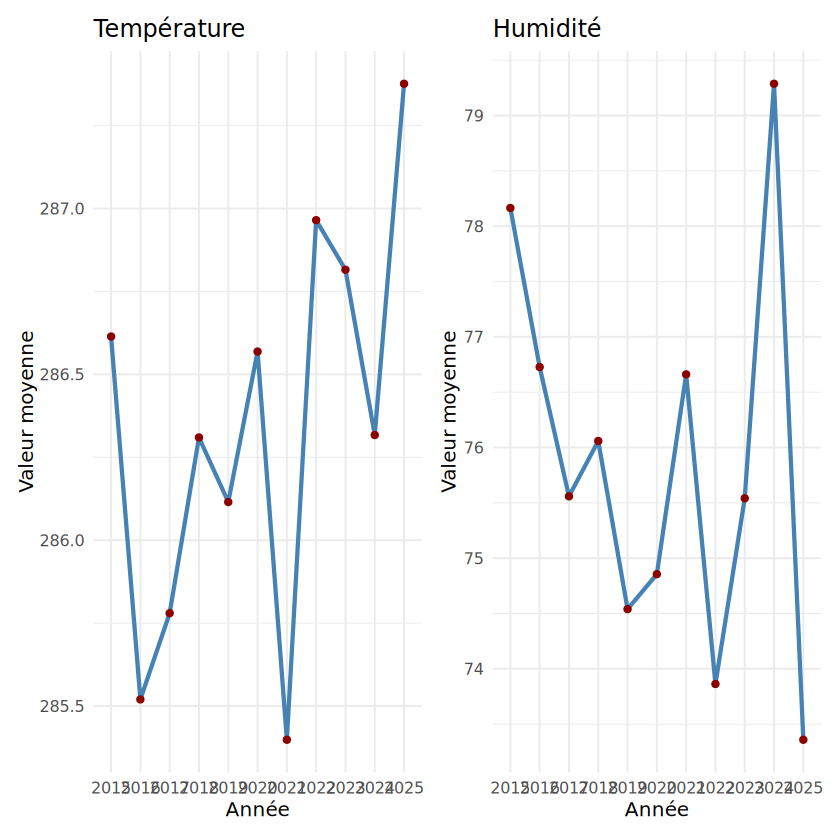

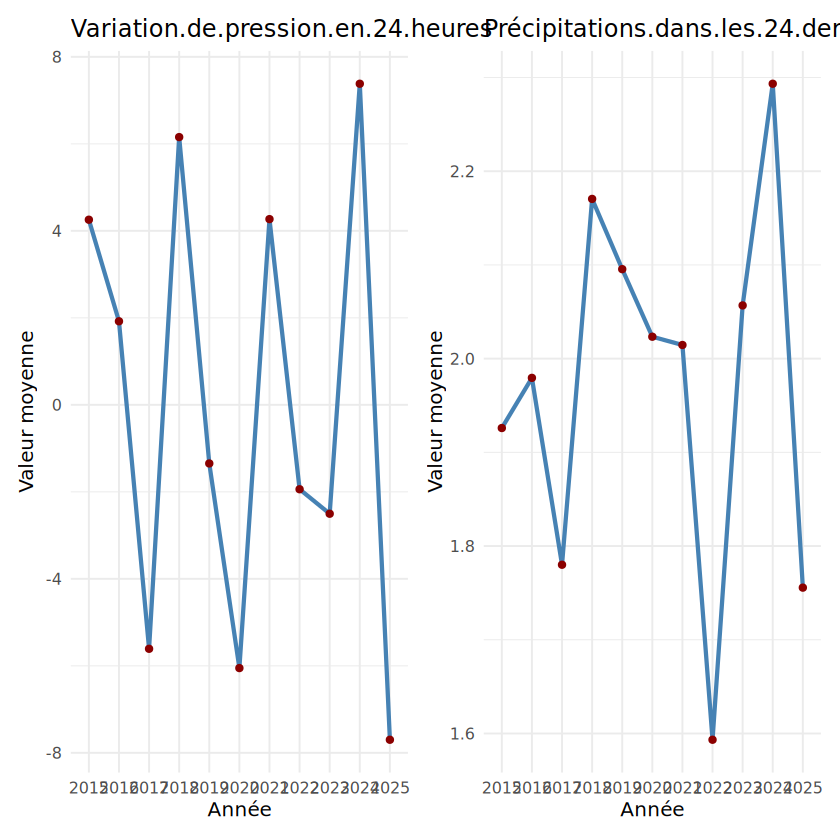

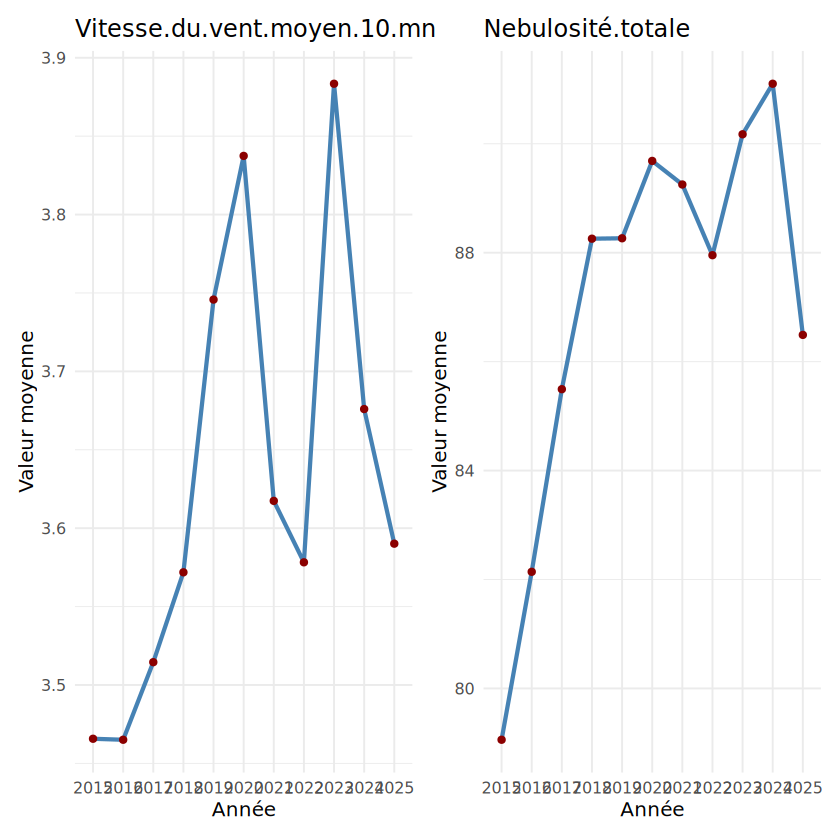

In [28]:
library(dplyr)
library(ggplot2)
library(patchwork)
# La colonne Date est de type caractère (ex: "2018-04-04T05:00:00+02:00")
data_metropole <- data_metropole %>%
  mutate(annee = format(as.Date(substr(Date, 1, 10)), "%Y"))
vars <- c("Température", 
          "Humidité", 
          "Variation.de.pression.en.24.heures", 
          "Précipitations.dans.les.24.dernières.heures", 
          "Vitesse.du.vent.moyen.10.mn", 
          "Nebulosité.totale")
# ---- Générer graphiques : moyennes par année ----
plots <- lapply(vars, function(v) {
  data_metropole %>%
    group_by(annee) %>%
    summarise(val_moy = mean(.data[[v]], na.rm = TRUE)) %>%
    ggplot(aes(x = annee, y = val_moy, group = 1)) +
    geom_line(color = "steelblue", size = 1.2) +
    geom_point(color = "darkred") +
    theme_minimal(base_size = 12) +
    labs(title = paste(v),
         x = "Année",
         y = "Valeur moyenne")
})

# ---- Organiser en grille 3 x 2 ----
(plots[[1]] |plots[[2]])  
(plots[[3]] |plots[[4]]) #/ 
(plots[[5]] |plots[[6]]) 


Les variables température, vent et nébulosité semblent montrer des tendances pluriannuelles (hausse ou fluctuations dirigées).

En revanche, pression et précipitations présentent un caractère plus aléatoire, fortement influencé par les événements météorologiques ponctuels.

L’année 2025 ressort comme atypique, avec des valeurs extrêmes (température et humidité élevées, précipitations plus faibles, nébulosité en léger recul).